#

## Imports

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from collections import Counter

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from random import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("masa_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


## Test the correlation between variable
We used two correlation test which are: Kendall correlationship coefficient - a statistic used to measure the ordinal association between two measured quantities Pearson correlationship coefficient - a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations.

Below shows the value of coeeficient between values. From the data, we can see that

In [65]:
tmp = df[["Duration" , "Gender", "Net Sales", "Commision (in value)"]]
print(tmp.info())

corr = tmp.corr(method ='pearson')
corr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              63326 non-null  int64  
 1   Gender                18219 non-null  object 
 2   Net Sales             63326 non-null  float64
 3   Commision (in value)  63326 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB
None


,Duration,Net Sales,Commision (in value)
Duration,1.000000,0.429235,0.344772
Net Sales,0.429235,1.000000,0.651315
Commision (in value),0.344772,0.651315,1.000000


## Chi-Squared Test
### Claim vs Product Name

In [66]:
claim_product = pd.crosstab(df["Product Name"], df["Claim"], margins=False)
claim_product

Claim,No,Yes
Product Name,,
1 way Comprehensive Plan,3322,9
2 way Comprehensive Plan,13016,142
24 Protect,247,0
Annual Gold Plan,173,21
Annual Silver Plan,1266,157
Annual Travel Protect Gold,90,10
Annual Travel Protect Platinum,50,3
Annual Travel Protect Silver,82,4
Basic Plan,5446,23


In [67]:
stat, p, dof, expected = stats.chi2_contingency(claim_product)
  
# Interpret p-value.
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 0.0
Dependent


### Claim vs Distribution Channel

In [68]:
claim_channel = pd.crosstab(df["Distribution Channel"], df["Claim"], margins=False)
claim_channel

Claim,No,Yes
Distribution Channel,,
Offline,1090,17
Online,61309,910


In [69]:
stat, p, dof, expected = stats.chi2_contingency(claim_product)
  
# Interpret p-value.
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 0.0
Dependent


### Claim vs Destination

In [70]:
claim_destination = pd.crosstab(df["Destination"], df["Claim"], margins=False)
claim_destination

Claim,No,Yes
Destination,,
ALBANIA,1,0
ANGOLA,1,0
ARGENTINA,21,1
ARMENIA,1,0
AUSTRALIA,3656,38
...,...,...
VENEZUELA,5,0
VIET NAM,1657,12
"VIRGIN ISLANDS, U.S.",1,0


In [71]:
stat, p, dof, expected = stats.chi2_contingency(claim_destination)
  
# Interpret p-value.
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 3.5186644140809715e-123
Dependent


### Claim vs Age Group

In [72]:
df["Age Group"] = pd.cut(df["Age"], bins=[-1,9,19,29,39,49,59,69,79,89,99,109,119], labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-109", "110-119"])
claim_age = pd.crosstab(df["Age Group"], df["Claim"], margins=False)
claim_age

Claim,No,Yes
Age Group,,
0-9,33,0
10-19,213,7
20-29,7312,203
30-39,36116,425
40-49,9290,140
50-59,5321,85
60-69,2390,40
70-79,628,15
80-89,122,2


In [73]:
stat, p, dof, expected = stats.chi2_contingency(claim_age)
  
# Interpret p-value.
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 2.893289798303885e-20
Dependent


In [74]:
df.drop("Age Group", axis=1, inplace=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


## Correlation Matrix
### Spearman

In [75]:
df.corr(method = 'spearman')

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.282096,0.123518,-0.015910
Net Sales,0.282096,1.000000,0.303544,0.023497
Commision (in value),0.123518,0.303544,1.000000,0.146004
Age,-0.015910,0.023497,0.146004,1.000000


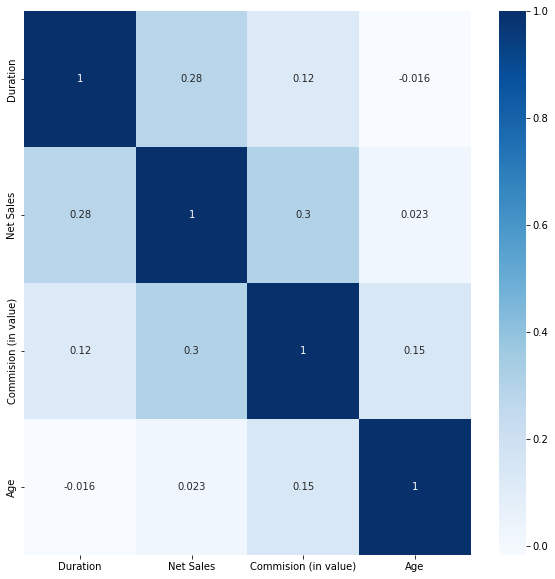

In [76]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(method = 'spearman'), annot=True, cmap = "Blues")
plt.show()

In [77]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [78]:
from scipy.stats import spearmanr
features = []
for item in df.columns:
    if df[item].dtype == "object" or df[item].dtype == "category":
        continue
    else:
        features.append(item)
        

for feature1 in features:
    for feature2 in features:
        coefficient, p = spearmanr(df[feature1].values, df[feature2].values)
        
        print(f"Coefficient of {feature1} and {feature2} is {coefficient} with p value of {round(p,4)}")

Coefficient of Duration and Duration is 0.9999999999999998 with p value of 0.0
Coefficient of Duration and Net Sales is 0.28209570660157546 with p value of 0.0
Coefficient of Duration and Commision (in value) is 0.12351803243758969 with p value of 0.0
Coefficient of Duration and Age is -0.015909913189712438 with p value of 0.0001
Coefficient of Net Sales and Duration is 0.2820957066015754 with p value of 0.0
Coefficient of Net Sales and Net Sales is 0.9999999999999998 with p value of 0.0
Coefficient of Net Sales and Commision (in value) is 0.30354371691361476 with p value of 0.0
Coefficient of Net Sales and Age is 0.023497226213689763 with p value of 0.0
Coefficient of Commision (in value) and Duration is 0.12351803243758969 with p value of 0.0
Coefficient of Commision (in value) and Net Sales is 0.30354371691361476 with p value of 0.0
Coefficient of Commision (in value) and Commision (in value) is 1.0 with p value of 0.0
Coefficient of Commision (in value) and Age is 0.146004392859066

### Conclusion of Statistical Test
The statistical tests have proven that each feature is most likely to be dependent to other features.

## Missing Value Treatment

In [79]:
# Find out the sum of null data for each feature.
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [80]:
# Find out the percentage of null data for each feature.
df.isnull().sum()/len(df)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.229827
Age                      0.000000
dtype: float64

In [81]:
df.drop("Gender", axis=1, inplace=True)

## Outlier Analysis and Treating

In [82]:
# Removing negative values for net sales and duration.
df = df[df["Net Sales"] >= 0]
df = df[df["Duration"] >= 0]
df.to_csv("removed_negative")
df = pd.read_csv("removed_negative")
df

,Unnamed: 0,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44
1,22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,25
2,23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,34
3,24,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,26
4,25,C2B,Airlines,Online,Annual Silver Plan,No,364,SINGAPORE,389.00,97.25,30
...,...,...,...,...,...,...,...,...,...,...,...
62638,63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.00,12.25,31
62639,63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.00,14.00,40
62640,63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.00,6.30,57
62641,63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.00,6.30,63


In [83]:
df.describe()

,Unnamed: 0,Duration,Net Sales,Commision (in value),Age
count,62643.000000,62643.000000,62643.000000,62643.000000,62643.000000
mean,31621.479128,48.960921,41.803969,9.655532,39.957202
std,18294.901131,101.929382,47.635665,19.668634,13.984385
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,15753.500000,9.000000,18.000000,0.000000,35.000000
50%,31568.000000,22.000000,27.000000,0.000000,36.000000
75%,47498.500000,52.000000,49.000000,10.640000,43.000000
max,63325.000000,4881.000000,810.000000,283.500000,118.000000


In [84]:
def detect_outliers(df, feature):
        
    # 1st quartile
    Q1 =  np.percentile(df[feature],25)
    # 3rd quartile
    Q3 = np.percentile(df[feature],75)
    #IQR
    IQR = Q3 - Q1
    # Outlier step
    outlier_step = IQR * 1.5
    # Detect outlier and their indices
    upper_limit = Q3 + outlier_step
    lower_limit = Q1 - outlier_step
    outlier_list_col = df[(df[feature] > Q3 + outlier_step) | (df[feature] < Q1 - outlier_step)].index
    outlier_list_col = list(outlier_list_col)
    # Number of rows with outliers
    len_outlier = ((df[feature] > Q3 + outlier_step) | (df[feature] < Q1 - outlier_step)).sum()
    print(f"{feature}:\nQ1: {Q1}\nQ3:{Q3}\nIQR: {IQR}\nUpper Limit: {upper_limit}\nLower Limit: {lower_limit}\nNumber of outlier rows: {len_outlier}\n")
    return outlier_list_col, upper_limit, lower_limit

In [85]:
features = ["Duration", "Net Sales", "Commision (in value)", "Age"]
outlier_id = []
upper_bounds = []
lower_bounds = []
for feature in features:
    outlier, upper_bound, lower_bound = detect_outliers(df, feature)
    outlier_id += outlier_id
    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)

id = np.unique(outlier_id)

Duration:
Q1: 9.0
Q3:52.0
IQR: 43.0
Upper Limit: 116.5
Lower Limit: -55.5
Number of outlier rows: 5612

Net Sales:
Q1: 18.0
Q3:49.0
IQR: 31.0
Upper Limit: 95.5
Lower Limit: -28.5
Number of outlier rows: 4886

Commision (in value):
Q1: 0.0
Q3:10.64
IQR: 10.64
Upper Limit: 26.6
Lower Limit: -15.96
Number of outlier rows: 6975

Age:
Q1: 35.0
Q3:43.0
IQR: 8.0
Upper Limit: 55.0
Lower Limit: 23.0
Number of outlier rows: 7311



In [86]:
for x in features:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median

In [87]:
# The reason of using loc is because the normal df[x][y] = mean | median will cause the df to retain a copy of original dataframe, 
# hence the assignation of value is failed.

for x in features:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median

df.to_csv("cleaned_data")
df.to_excel("cleaned.xlsx", sheet_name="cleaned")

In [88]:
for i in range(len(features)):
     upper = upper_bounds[i]
     lower = lower_bounds[i]
     len_outlier = ((df[features[i]] > upper) | (df[features[i]] < lower)).sum()
     print(f"Number of outlier rows: {len_outlier}\n")

df

Number of outlier rows: 0

Number of outlier rows: 0

Number of outlier rows: 0

Number of outlier rows: 0



,Unnamed: 0,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,36
1,22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,36
2,23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,27.00,0.00,34
3,24,C2B,Airlines,Online,Silver Plan,No,22,SINGAPORE,27.00,0.00,36
4,25,C2B,Airlines,Online,Annual Silver Plan,No,22,SINGAPORE,27.00,0.00,36
...,...,...,...,...,...,...,...,...,...,...,...
62638,63321,JZI,Airlines,Online,Basic Plan,No,22,JAPAN,35.00,12.25,36
62639,63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.00,14.00,36
62640,63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.00,6.30,36
62641,63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.00,6.30,36


In [89]:
# Prepare data
X = df.drop(columns=["Claim"])
y = df["Claim"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

enc = OneHotEncoder(handle_unknown="ignore")
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Model training
Next, we need to train the model, using the code shown below.

In [90]:
# Decision tree.
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)
accuracy = accuracy_score(y_test, predict)
accuracy

0.9859525899912204

## Hyperparameter tuning

In [91]:
# Tuning using randomized search.
param_rs = {
    "max_depth": [3, None],
    "max_features": [randint(1, 9)],
    "min_samples_leaf": [randint(1, 9)],
    "criterion": ["gini", "entropy"]
}
dtc_rs = RandomizedSearchCV(dtc, param_rs, cv=5)
dtc_rs.fit(X_train, y_train)
dtc_rs.best_params_, dtc_rs.best_score_

c:\Users\notth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


({'min_samples_leaf': 3,
  'max_features': 5,
  'max_depth': 3,
  'criterion': 'gini'},
 0.9850740323796876)

In [92]:
# Tuning using grid search.
param_gs = {
    "ccp_alpha": [0.1, 0.01, 0.001],
    "max_depth": [5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"]
}
dtc_gs = GridSearchCV(estimator=dtc, param_grid=param_gs, cv=5, verbose=True)
dtc_gs.fit(X_train, y_train)
dtc_gs.best_params_, dtc_gs.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


({'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5}, 0.9850740323796876)